In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv('customer_churn.csv')
df.head()

,tenure_months,monthly_charges,support_tickets,is_premium,avg_usage_hours,churn
0,59,38.545887,1,0,8.884947,1
1,37,66.209729,1,1,3.499774,0
2,61,20.123184,0,0,8.663038,1
3,43,79.832727,9,0,1.002993,1
4,70,80.730645,7,1,1.159190,0


Accuracy:0.5250

Precision:0.5417

Recall:0.6190
F1 Score:0.5778

ROC AUC:0.4737

Confusion Matrix:
[[ 8 11]
 [ 8 13]]



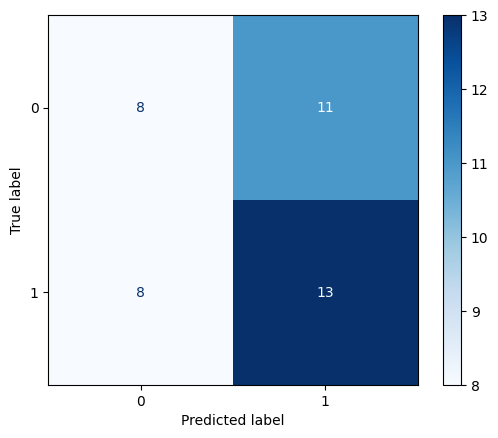

In [5]:
x=df[['tenure_months','monthly_charges','support_tickets','is_premium','avg_usage_hours']]
y=df['churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

# Scale features
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

# fit logistic regression
model = LogisticRegression()
model.fit(x_train_scaled,y_train)

# Predictions
y_pred = model.predict(x_test_scaled)
y_prob = model.predict_proba(x_test_scaled)[:, 1]

# Metrics

# Print results
print(f'Accuracy:{accuracy_score(y_test,y_pred):.4f}\n')
print(f'Precision:{precision_score(y_test,y_pred):.4f}\n')
print(f'Recall:{recall_score(y_test,y_pred):.4f}')
print(f'F1 Score:{f1_score(y_test,y_pred):.4f}\n')
print(f'ROC AUC:{roc_auc_score(y_test,y_prob):.4f}\n')
print(f'Confusion Matrix:\n{confusion_matrix(y_test,y_pred)}\n')
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred)).plot(cmap='Blues')
plt.savefig('confusion_matrix.png')
plt.show()